# Exercise 2 : Statsmodel.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('EnergyProduction.csv', index_col='DATE', parse_dates=['DATE'])
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [3]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

Assigning a frequency of **MS** : Month Start.

In [4]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

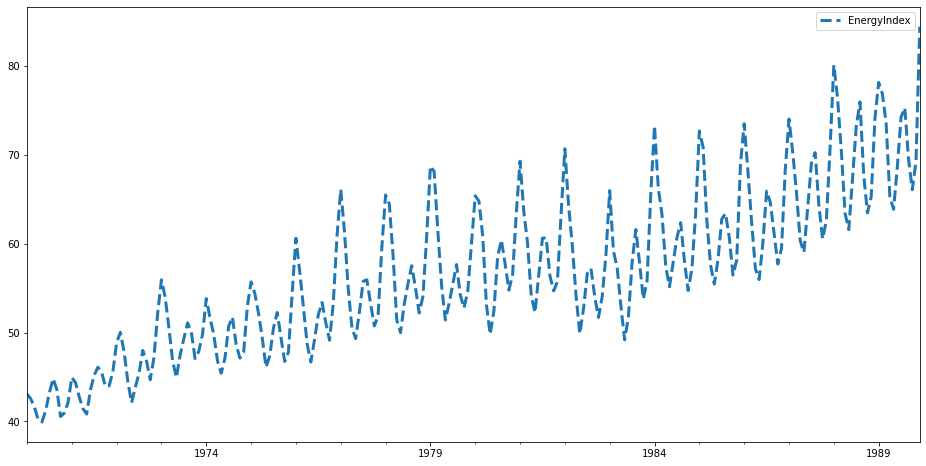

In [5]:
df.plot(figsize=(16,8), xlabel='', ls='--', lw=3);

12 Month SMA : Simple Moving Average. (Rolling window))

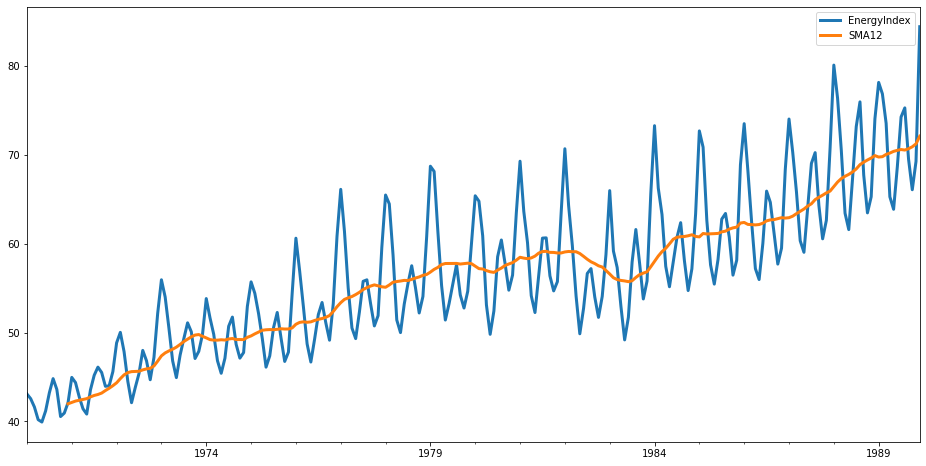

In [6]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()
df.plot(figsize=(16,8), xlabel='', lw=3);

12 Month EWMA : Exponentially Weighted Moving Average.

DES : Double Exponential Smoothing.

**span = 12**

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


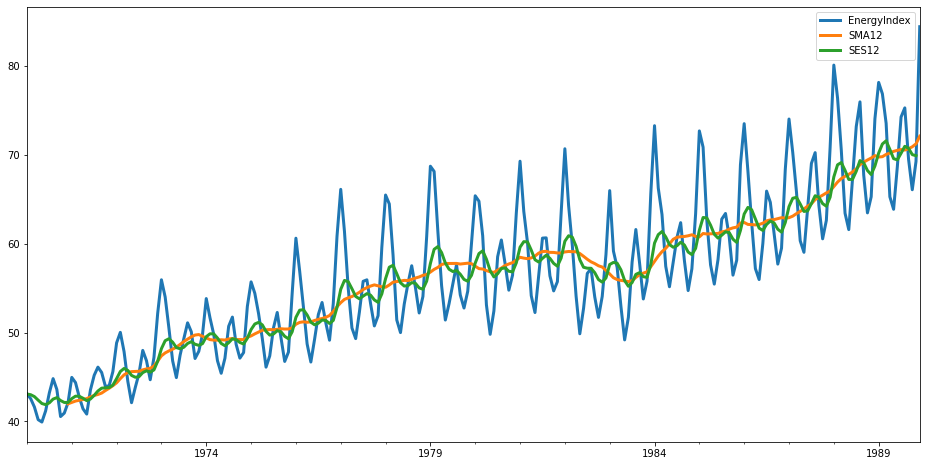

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df['SES12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=2/(12+1), optimized=False).fittedvalues.shift(-1)
df.plot(figsize=(16,8), xlabel='', lw=3);

**TES** : Triple Exponential Smoothing with **Multiplicative** Model.

In [8]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [9]:
df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\Kirankumar\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


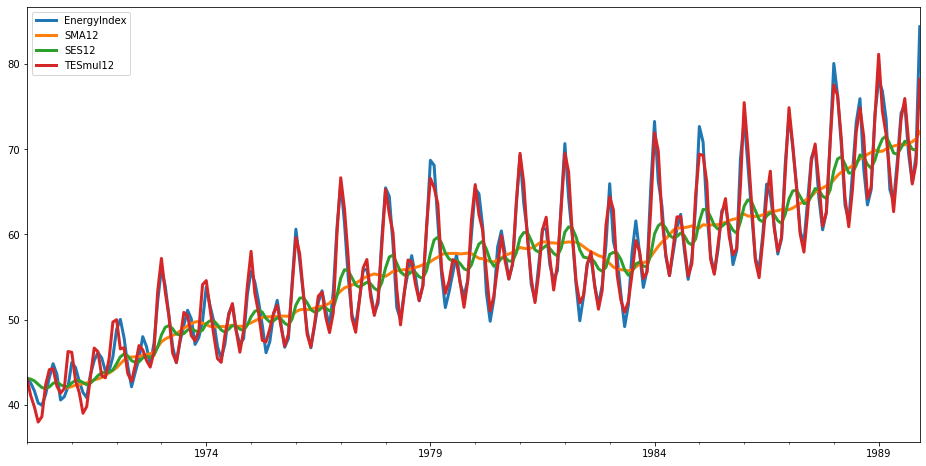

In [10]:
df.plot(figsize=(16,8), xlabel='', lw=3);

Having a closer look.

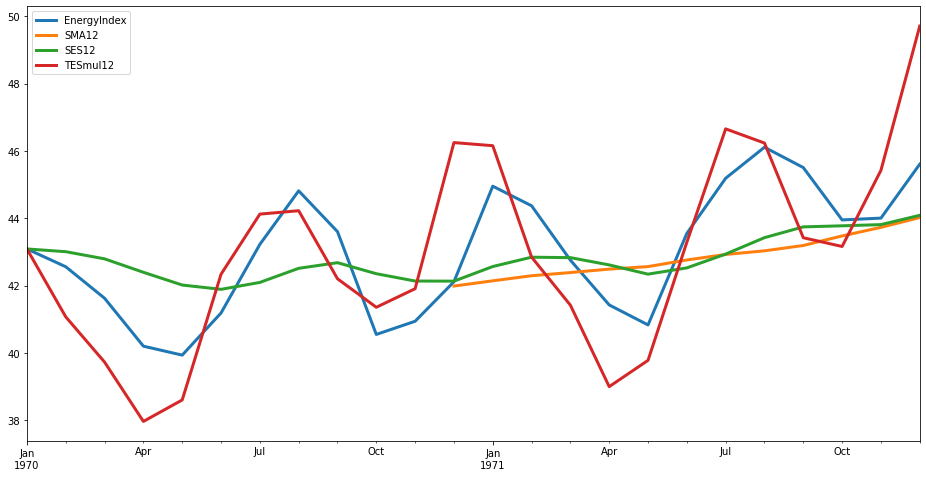

In [11]:
df.iloc[:24].plot(figsize=(16,8), xlabel='', lw=3);